<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/loanapproval.csv")
data.head(2)

,applicant_id,age,gender,marital_status,annual_income,loan_amount,credit_score,num_dependents,existing_loans_count,employment_status,loan_approved
0,1,59,Male,Divorced,100073,7169,793,1,1,Unemployed,1
1,2,49,Male,Married,112197,23556,789,0,2,Employed,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   applicant_id          1000 non-null   int64 
 1   age                   1000 non-null   int64 
 2   gender                1000 non-null   object
 3   marital_status        1000 non-null   object
 4   annual_income         1000 non-null   int64 
 5   loan_amount           1000 non-null   int64 
 6   credit_score          1000 non-null   int64 
 7   num_dependents        1000 non-null   int64 
 8   existing_loans_count  1000 non-null   int64 
 9   employment_status     1000 non-null   object
 10  loan_approved         1000 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 86.1+ KB


In [ ]:
data.isnull().sum()

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
unique=pd.DataFrame({
    "Columns": data.columns,
    "Unique_values":[data [col].unique() for col in data.columns]
})
print("employment_status:", data['employment_status'].nunique())
print("\nEmployment stateus counts:")
print(data["employment_status"].value_counts())
print("***********************")

print("existing_loans_count: ",data['existing_loans_count'].nunique())
print("\nExisting loans count:")
print(data['existing_loans_count'].value_counts())
print("***************************")

print("age:",data['age'].nunique())
#print("\nAge")
#print(data['age'].value_counts())
print("**********************")

print("gender:",data['gender'].nunique())
print("\nGender")
print(data['gender'].value_counts())
print("************************")

print("marital_status:",data['marital_status'].nunique())
print("\nMarital_status")
print(data["marital_status"].value_counts())
print("**************************")

print("annual_income:",data['annual_income'].nunique())
#print("\nAnnual_income")
#print(data["annual_income"].value_counts())
print("***************************")

print("loan_amount:",data['loan_amount'].nunique())
#print("\nLoan_amount")
#print(data["loan_amount"].value_counts())
print("**************************")

print("credit_score:",data['credit_score'].nunique())
#print("\nCredit_score")
#print(data['credit_score'].value_counts())
print("**************************")

print( 'num_dependents:',data['num_dependents'].nunique())
#print("\nnum_dependents")
print(data['num_dependents'].value_counts())
print("**************************")

print("loan_approved:",data['loan_approved'].nunique())
print("\nloan_approved")
print(data['loan_approved'].value_counts())
print("***********************")

employment_status: 3

Employment stateus counts:
employment_status
Self-employed    350
Unemployed       330
Employed         320
Name: count, dtype: int64
***********************
existing_loans_count:  5

Existing loans count:
existing_loans_count
1    229
4    212
3    205
0    179
2    175
Name: count, dtype: int64
***************************
age: 44
**********************
gender: 2

Gender
gender
Male      524
Female    476
Name: count, dtype: int64
************************
marital_status: 3

Marital_status
marital_status
Married     355
Single      342
Divorced    303
Name: count, dtype: int64
**************************
annual_income: 996
***************************
loan_amount: 990
**************************
credit_score: 452
**************************
num_dependents: 5
num_dependents
0    206
2    204
1    200
4    199
3    191
Name: count, dtype: int64
**************************
loan_approved: 2

loan_approved
loan_approved
1    729
0    271
Name: count, dtype: int64
**********

**EDA and Visualization**

In [7]:
data["income_group"]=pd.cut(
    data['annual_income'],
    bins=4,
    labels=["low","medium","High","Very high"]
)
annu=data.groupby("income_group")["loan_amount"].mean().reset_index()
annu

/tmp/ipython-input-1365836303.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annu=data.groupby("income_group")["loan_amount"].mean().reset_index()


,income_group,loan_amount
0,low,27883.422939
1,medium,26670.975410
2,High,27708.486692
3,Very high,26496.920561


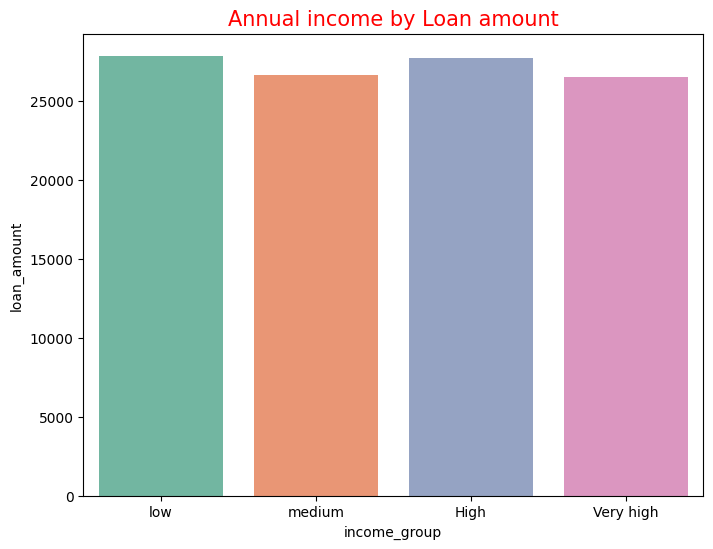

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(x="income_group",y="loan_amount",data=annu,palette="Set2",hue="income_group")
plt.title("Annual income by Loan amount",fontsize=15,color="red")
plt.show()

In [9]:
data["Credit_group"]=pd.cut(
    data['credit_score'],
    bins=[300,570,650,760,850],
    labels=["Poor","Fair","Good","Very Good"]
)
income=data.groupby("Credit_group")["loan_approved"].mean().reset_index()
income

/tmp/ipython-input-4070995730.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income=data.groupby("Credit_group")["loan_approved"].mean().reset_index()


,Credit_group,loan_approved
0,Poor,0.563636
1,Fair,0.804348
2,Good,0.914286
3,Very Good,0.935897


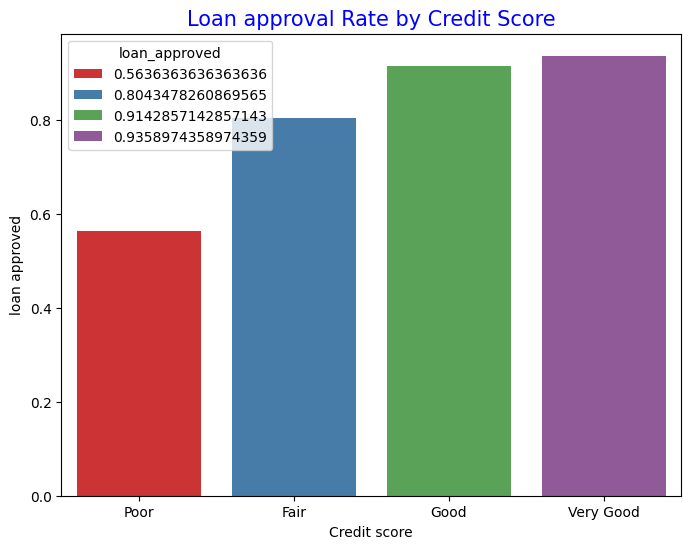

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x="Credit_group",y="loan_approved",data=income,palette="Set1",hue="loan_approved")
plt.xlabel("Credit score")
plt.ylabel("loan approved")
plt.title("Loan approval Rate by Credit Score",fontsize=15,color="blue")
plt.show()

In [11]:
data['gender']=data['gender'].map({"Male":0,"Female":1})

In [12]:
data['marital_status']=data['marital_status'].map({"Divorced":0,"Married":1,"Single":2})

In [13]:
data['employment_status']=data['employment_status'].map({"Unemployed":0,"Employed":1,"Self-employed":2})

In [14]:
data.head(2)

,applicant_id,age,gender,marital_status,annual_income,loan_amount,credit_score,num_dependents,existing_loans_count,employment_status,loan_approved,income_group,Credit_group
0,1,59,0,0,100073,7169,793,1,1,0,1,High,Very Good
1,2,49,0,1,112197,23556,789,0,2,1,1,High,Very Good


**ML**

In [15]:
x=data.drop(["applicant_id","loan_approved","income_group","Credit_group"],axis=1)
y=data['loan_approved']

In [16]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 9)
(200, 9)
(800,)
(200,)


In [23]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
y_pred=model.predict(x_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.97      1.00      0.99       145

    accuracy                           0.98       200
   macro avg       0.99      0.96      0.97       200
weighted avg       0.98      0.98      0.98       200



In [28]:
y_prob=model.predict_proba(x_test)[:,1]

In [30]:
from sklearn.metrics import roc_curve,roc_auc_score


**ROC Curve**

In [31]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
auc_score=roc_auc_score(y_test,y_prob)

print("AUC Score:",auc_score)

AUC Score: 0.9991222570532916


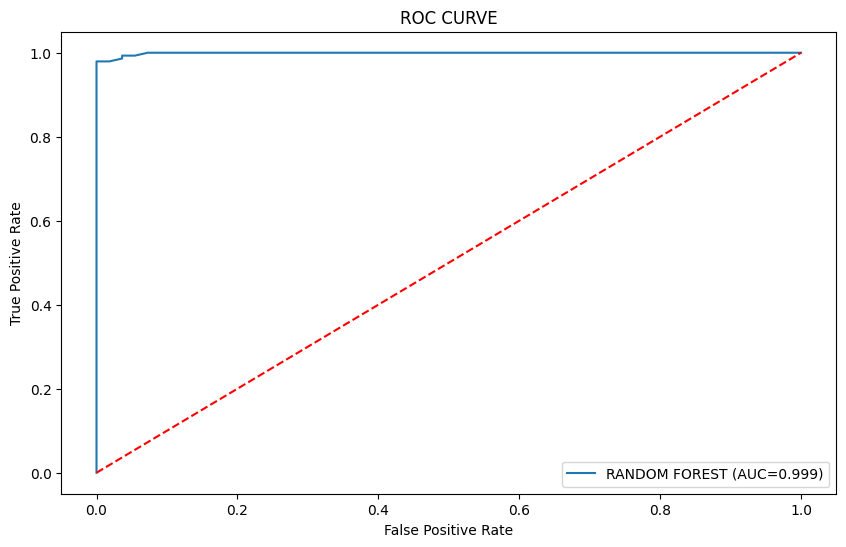

In [34]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label=f"RANDOM FOREST (AUC={auc_score:.3f})")
plt.plot([0,1],[0,1],linestyle="--",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend()
plt.show()